In [5]:
import pandas as pd
#Importamos los datos del dataset 
data = pd.read_csv('Grupo_2_data_CO2_short.csv')

#Eliminamos los espacios en blancos en los nombres de las columnas para facilitar la manipulación de los datos
nombre_colum= list(data.columns.values)
for i in range(len(nombre_colum)):
    nombre_colum[i]=nombre_colum[i].strip() 
data.columns = nombre_colum
#Mostramos los datos
data

,Yr,Mn,Date,CO2
0,1957,3,1957.2027,315.45
1,1957,4,1957.2877,315.74
2,1957,5,1957.3699,315.84
3,1957,6,1957.4548,315.28
4,1957,7,1957.5370,-99.99
...,...,...,...,...
758,2020,5,2020.3716,418.17
759,2020,6,2020.4563,416.11
760,2020,7,2020.5383,407.54
761,2020,8,2020.6230,406.61


Condiciones de los datos: 

Identifique el intervalo de tiempo continuo (meses consecutivos) más extenso que cumple tres condiciones:

- El intervalo termina con la última observación de Septiembre 2020 (último dato del intervalo)
- El intervalo comienza con una observación con un dato válido de CO2 (condición 1 para el primer dato)
- En todo el intervalo más del 95% de las observaciones tienen un dato de CO2 válido (condición 2)

In [6]:
#verificación de existencia de valores nulos
print(data.isnull().sum()) 
print("Cantidad total de valores nulos ", data.isnull().sum().sum()) 

Yr      0
Mn      0
Date    0
CO2     0
dtype: int64
Cantidad total de valores nulos  0


In [7]:
#Atendiendo la condición 1, el último dato del dataset coincide con la última observación del 2020
data.loc[data['Mn'] == 9 ]
print(data.iloc[762])


Yr      2020.0000
Mn         9.0000
Date    2020.7077
CO2      410.8700
Name: 762, dtype: float64


In [8]:
#Creación de la dataset con la cual vamos a trabajar.

pos=0; neg=0; por=0

#Recorremos todos los datos del dataset
for i in range(len(data)):
  #Primera condición, se crea el intervalo siempre y cuando CO2 sea un dato válido
  if data.CO2.values[i] > 0: 
    #Creo el intervalo desde la posición 'i' hasta la última posición del dataset (2da condición)
    intervalo=data[i:]
    #Recorro los datos del intervalo recién creado contando los valores positivos y negativos
    for j in range(len(intervalo)): 
        #Si el dato en la posición 'j' es mayor que 0, sumo 1 a la variable pos
        if intervalo.CO2.values[j] >= 0:
            pos=pos + 1
        #Si el dato es negativo, sumo 1 a la variable neg
        else:
            neg=neg+1
    #Calculo porcentaje de los valores pos
    por= (pos / (pos+neg) )*100
    #Reinicio contadores
    pos=0; neg=0; 
    #Comprobamos la 3ra condición, apenas se cumpla que el porcentaje 'por' es mayor que 94, se guarda el dataset en la posición 'i' y se detiene el bloque
    if por >= 94:
        data_f=data[i:]
        break 
print('Intervalo final: \n', data_f)
             

Intervalo final: 
        Yr  Mn       Date     CO2
292  1981   7  1981.5370  337.94
293  1981   8  1981.6219  336.44
294  1981   9  1981.7068  -99.99
295  1981  10  1981.7890  339.23
296  1981  11  1981.8740  340.16
..    ...  ..        ...     ...
758  2020   5  2020.3716  418.17
759  2020   6  2020.4563  416.11
760  2020   7  2020.5383  407.54
761  2020   8  2020.6230  406.61
762  2020   9  2020.7077  410.87

[471 rows x 4 columns]


In [9]:
#Añadimos una nueva columna que contendrá los nuevos valores de CO2
data_f['newCO2']= data_f.CO2.values
data_f

C:\Users\Jose\AppData\Local\Temp\ipykernel_14784\1912727356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['newCO2']= data_f.CO2.values


,Yr,Mn,Date,CO2,newCO2
292,1981,7,1981.5370,337.94,337.94
293,1981,8,1981.6219,336.44,336.44
294,1981,9,1981.7068,-99.99,-99.99
295,1981,10,1981.7890,339.23,339.23
296,1981,11,1981.8740,340.16,340.16
...,...,...,...,...,...
758,2020,5,2020.3716,418.17,418.17
759,2020,6,2020.4563,416.11,416.11
760,2020,7,2020.5383,407.54,407.54
761,2020,8,2020.6230,406.61,406.61


In [10]:
#Comprobamos la posición y cantidad de los valores negativos dentro de la columna 'CO2'
pos_neg=[]
for i in range(len(data_f)):
    if data_f.CO2.values[i] < 0:
        pos_neg.append(i)
print(pos_neg)
print('Cantidad de valores negativos', len(pos_neg))

[2, 7, 13, 15, 53, 54, 61, 114, 136, 173, 185, 208, 258, 280, 305, 316, 320, 326, 336, 352, 362, 365, 388, 402, 415, 449, 458, 462]
Cantidad de valores negativos 28


In [12]:
### Creación de bloques ###
###########################

#Inicializamos contadores:
i=0; j=0; bloque=[]; date=[]; t=0
#Ejecutamos los pasos mientras i sea menor al tamaño del dataset recién creado
while i < len(data_f):   
    #Si el valor en la posición 'i' es negativo, creamos el bloque
    if data_f.CO2.values[i] < 0:
        #añadimos el valor inmediatamente anterior al valor negativo como inicio del bloque
        bloque.append(data_f.CO2.values[i-1])
        #añadimos la fecha correspondiente a ese valor a un bloque de fechas
        date.append(data_f.Date.values[i-1])
        #Guardamos la posición del primer valor negativo dentro del bloque
        pos=i
        #Creamos un nuevo ciclo que ejecute los procesos siguientes siempre y cuando los valores a recorrer sean negativos, partimos de la posición 'i'
        j=i
        while data_f.CO2.values[j] < 0: 
            #guardamos los valores negativos en el bloque
            bloque.append(data_f.CO2.values[j])
            #guardamos las fechas correspondientes
            date.append(data_f.Date.values[j]) 
            j=j+1
        #Si se deja de cumplir la condición, es porque estamos en un positivo, guardamos ese valor positivo como final del intervalo y guardamos su fecha correspondiente
        else:
            bloque.append(data_f.CO2.values[j])
            date.append(data_f.Date.values[j])
            i=i+1
    ##### Ajuste de los nuevos valores:  #####
    ################################################

    #Ejecutamos el proceso solo si el bloque no está vacío
    if bool(bloque) == True:
        #Límite inferior del bloque
        bloque_inf= bloque[0]
        #Límite superior del bloque
        bloque_sup= bloque[-1]
        #Fecha inferior del bloque de fechas
        date_inf= date[0]
        #Fecha superior del bloque de fechas
        date_sup= date[-1]
         
        #Si el tamaño del bloque es 3, el ajuste de valores es inmediato.
        if len(bloque) == 3:
            t= date[1]
            data_f.newCO2.values[pos] =(1/(date_sup - date_inf)) * ( (t- date_inf)*bloque_sup - (t - date_sup)*bloque_inf) 
        #Si el tamaño del bloque es 4, el ajuste de valores se hace para dos valores consecutivos: 'pos' y 'pos + 1'
        else:
            t= date[1]
            data_f.newCO2.values[pos]  =(1/(date_sup - date_inf)) * ( (t-date_inf)* bloque_sup - (t - date_sup)* bloque_inf)

            t= date[2]
            data_f.newCO2.values[pos+1] =(1/(date_sup - date_inf)) * ( (t-date_inf)* bloque_sup - (t - date_sup)* bloque_inf)
    #Vaciamos las variables al término del proceso para que no se concatenen al ejecutar el proceso nuevamente.   
    bloque=[]; date=[]
    i=i+1; j=0;

In [13]:
#Imprimimos la nueva tabla:
data_f

,Yr,Mn,Date,CO2,newCO2
292,1981,7,1981.5370,337.94,337.94000
293,1981,8,1981.6219,336.44,336.44000
294,1981,9,1981.7068,-99.99,337.85754
295,1981,10,1981.7890,339.23,339.23000
296,1981,11,1981.8740,340.16,340.16000
...,...,...,...,...,...
758,2020,5,2020.3716,418.17,418.17000
759,2020,6,2020.4563,416.11,416.11000
760,2020,7,2020.5383,407.54,407.54000
761,2020,8,2020.6230,406.61,406.61000


In [14]:
#Nueva tabla actualizada, comprobar con los valores de la lista "pos_neg" creada anteriormente los nuevos valores.
#2, 7, 13, 15, 53, 54, 61, 114, 136, 173, 185, 208, 258, 280, 305, 316, 320, 326, 336, 352, 362, 365, 388, 402, 415, 449, 458, 462
data_f.iloc[462]

Yr        2020.000000
Mn           1.000000
Date      2020.041000
CO2        -99.990000
newCO2     419.161693
Name: 754, dtype: float64

In [17]:
#Item 3
#Importamos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
from scipy.optimize import curve_fit
#from sklearn.metrics import mean_squared_error
import time

#se agrega la columna t-T a la tabla data_f
data_f['t-T'] = data_f.apply(lambda x: x['Date'] - data_f.Date.values[0], axis = 1)
data_f

C:\Users\Jose\AppData\Local\Temp\ipykernel_14784\4138994949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['t-T'] = data_f.apply(lambda x: x['Date'] - data_f.Date.values[0], axis = 1)


,Yr,Mn,Date,CO2,newCO2,t-T
292,1981,7,1981.5370,337.94,337.94000,0.0000
293,1981,8,1981.6219,336.44,336.44000,0.0849
294,1981,9,1981.7068,-99.99,337.85754,0.1698
295,1981,10,1981.7890,339.23,339.23000,0.2520
296,1981,11,1981.8740,340.16,340.16000,0.3370
...,...,...,...,...,...,...
758,2020,5,2020.3716,418.17,418.17000,38.8346
759,2020,6,2020.4563,416.11,416.11000,38.9193
760,2020,7,2020.5383,407.54,407.54000,39.0013
761,2020,8,2020.6230,406.61,406.61000,39.0860


c:\Users\Jose\anaconda3\envs\demo\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Valor estimado de o0 : 373.878009372009


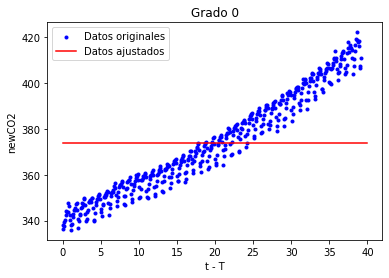

Tiempo de procesamiento: 0.3151829242706299 segundo/s


In [18]:
#Para n=0
#Se toma la hora de iniciciacion del programa  
start=time.time()

#se ingresa la funcion
def function(x,o0,o1=0):
   return o0+(x*0)

#Se reescriben los datos necesarios como un array
x=data_f['t-T']
x=np.array(x)
y=data_f['newCO2']
y=np.array(y)

#Optimizacion de la funcion y valors tetha
popt,cov=scipy.optimize.curve_fit(function, x, y)
o0,o1= popt

#Minimo
x_new_value = np.arange(min(x), 40,0.08495)
y_new_value = function(x_new_value, o0,0)

#Ploteo
plt.scatter(x,y,color="blue",label='Datos originales',marker='.')
plt.legend(loc='upper left')
plt.plot(x_new_value,y_new_value,color="red",label='Datos ajustados')
plt.legend(loc='upper left')
plt.xlabel('t - T')
plt.ylabel('newCO2')
print("Valor estimado de o0 : "+ str(o0))
plt.title("Grado 0")
plt.show()

#Se toma la hora de finalizacion del programa 
stop=time.time()
print('Tiempo de procesamiento: '+str(stop-start)+' segundo/s')

Valor estimado de o0 : 337.0240584714833
Valor estimado de o1 : 1.8816964836374035


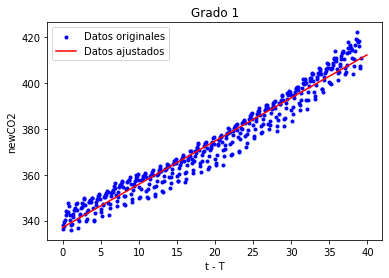

NameError: name 'mean_squared_error' is not defined

In [20]:
#Para n=1
#Se toma la hora de iniciciacion del programa  
start=time.time()

#se ingresa la funcion
def function(x,o0,o1):
   return o0+(x*o1)

#Se reescriben los datos necesarios como un array
x=data_f['t-T']
x=np.array(x)
y=data_f['newCO2']
y=np.array(y)

#Optimizacion de la funcion y valors tetha
popt,cov=scipy.optimize.curve_fit(function, x, y)
o0,o1= popt

#Minimo
x_new_value = np.arange(min(x), 40,0.08495)
y_new_value = function(x_new_value, o0,o1)

#Ploteo
plt.scatter(x,y,color="blue",label='Datos originales',marker='.')
plt.legend(loc='upper left')
plt.plot(x_new_value,y_new_value,color="red",label='Datos ajustados')
plt.legend(loc='upper left')
plt.xlabel('t - T')
plt.ylabel('newCO2')
print("Valor estimado de o0 : "+ str(o0))
print("Valor estimado de o1 : " + str(o1))
plt.title("Grado 1")
plt.show()

#Error Cuadratico medio
f=o0+(x*o1)

y=np.array(y)
f=np.array(f)
ECM=mean_squared_error(y,f)
print(ECM)

#Se toma la hora de finalizacion del programa 
stop=time.time()
print('Tiempo de procesamiento: '+str(stop-start)+' segundo/s')

Valor estimado de o0 : 341.9167008207019
Valor estimado de o1 : 1.1307526150794867
Valor estimado de o2 : 0.01917092052833566


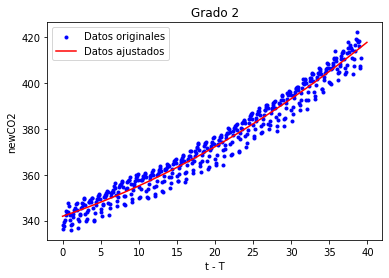

NameError: name 'mean_squared_error' is not defined

In [21]:
#Para n=2
#Se toma la hora de iniciciacion del programa 
start=time.time()

#se ingresa la funcion
def function(x,o0,o1,o2):
   return o0+(x*o1)+(o2*x**2)

#Se reescriben los datos necesarios como un array
x=data_f['t-T']
x=np.array(x)
y=data_f['newCO2']
y=np.array(y)

#Optimizacion de la funcion y valors tetha
popt,cov=scipy.optimize.curve_fit(function, x, y)
o0,o1,o2= popt

#Minimo
x_new_value = np.arange(min(x), 40,0.08495)
y_new_value = function(x_new_value, o0,o1,o2)

#Ploteo
plt.scatter(x,y,color="blue",label='Datos originales',marker='.')
plt.legend(loc='upper left')
plt.plot(x_new_value,y_new_value,color="red",label='Datos ajustados')
plt.legend(loc='upper left')
plt.xlabel('t - T')
plt.ylabel('newCO2')
print("Valor estimado de o0 : "+ str(o0))
print("Valor estimado de o1 : " + str(o1))
print("Valor estimado de o2 : "+ str(o2))
plt.title("Grado 2")
plt.show()

#Error cuadratico medio
f=o0+(x*o1)+(o2*x**2)

y=np.array(y)
f=np.array(f)
ECM=mean_squared_error(y,f)
print(ECM)

#Se toma la hora de finalizacion del programa 
stop=time.time()
print('Tiempo de procesamiento: '+str(stop-start)+' segundo/s')

Valor estimado de o0 : 341.1469294560051
Valor estimado de o1 : 1.367767449799894
Valor estimado de o2 : 0.004028719318081884
Valor estimado de o3 : 0.00025771111302310085


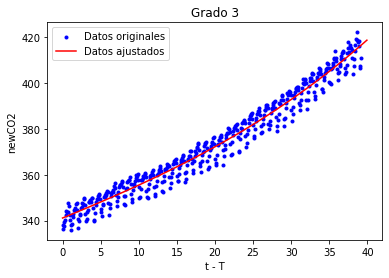

NameError: name 'mean_squared_error' is not defined

In [22]:
#Para n=3
#Se toma la hora de iniciciacion del programa 
start=time.time()

#se ingresa la funcion
def function(x,o0,o1,o2,o3):
   return o0+(x*o1)+(o2*x**2)+(o3*x**3)

#Se reescriben los datos necesarios como un array
x=data_f['t-T']
x=np.array(x)
y=data_f['newCO2']
y=np.array(y)

#Optimizacion de la funcion y valors tetha
popt,cov=scipy.optimize.curve_fit(function, x, y)
o0,o1,o2,o3= popt

#Minimo
x_new_value = np.arange(min(x), 40,0.08495)
y_new_value = function(x_new_value, o0,o1,o2,o3)

#Ploteo
plt.scatter(x,y,color="blue",label='Datos originales',marker='.')
plt.legend(loc='upper left')
plt.plot(x_new_value,y_new_value,color="red",label='Datos ajustados')
plt.legend(loc='upper left')
plt.xlabel('t - T')
plt.ylabel('newCO2')
print("Valor estimado de o0 : "+ str(o0))
print("Valor estimado de o1 : " + str(o1))
print("Valor estimado de o2 : "+ str(o2))
print("Valor estimado de o3 : " + str(o3))
plt.title("Grado 3")
plt.show()

#Error Cuadratico medio
f=o0+(x*o1)+(o2*x**2)+(o3*x**3)

y=np.array(y)
f=np.array(f)
ECM=mean_squared_error(y,f)
print(ECM)

#Se toma la hora de finalizacion del programa 
stop=time.time()
print('Tiempo de procesamiento: '+str(stop-start)+' segundo/s')

Valor estimado de o0 : 340.26766540360666
Valor estimado de o1 : 1.8208195247815075
Valor estimado de o2 : -0.04814090234891901
Valor estimado de o3 : 0.0023308556966113105
Valor estimado de o4 : -2.646271402377511e-05


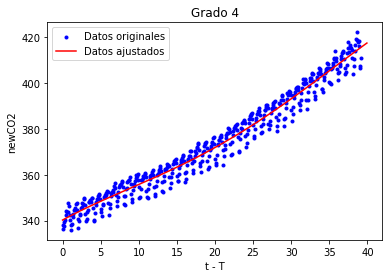

NameError: name 'mean_squared_error' is not defined

In [23]:
#Para n=4
#Se toma la hora de iniciciacion del programa 
start=time.time()

#se ingresa la funcion
def function(x,o0,o1,o2,o3,o4):
    return o0+(x*o1)+(o2*x**2)+(o3*x**3)+(o4*x**4)

#Se reescriben los datos necesarios como un array
x=data_f['t-T']
x=np.array(x)
y=data_f['newCO2']
y=np.array(y)

#Optimizacion de la funcion y valors tetha    
popt,cov=scipy.optimize.curve_fit(function, x, y)
o0,o1,o2,o3,o4= popt

#Minimo
x_new_value = np.arange(min(x), 40,0.08495)
y_new_value = function(x_new_value, o0,o1,o2,o3,o4)

#Ploteo
plt.scatter(x,y,color="blue",label='Datos originales',marker='.')
plt.legend(loc='upper left')
plt.plot(x_new_value,y_new_value,color="red",label='Datos ajustados')
plt.legend(loc='upper left')
plt.xlabel('t - T')
plt.ylabel('newCO2')
print("Valor estimado de o0 : "+ str(o0))
print("Valor estimado de o1 : " + str(o1))
print("Valor estimado de o2 : "+ str(o2))
print("Valor estimado de o3 : " + str(o3))
print("Valor estimado de o4 : " + str(o4))
plt.title("Grado 4")
plt.show()

#Error Cuadratico medio
f=o0+(x*o1)+(o2*x**2)+(o3*x**3)+(o4*x**4)

y=np.array(y)
f=np.array(f)
ECM=mean_squared_error(y,f)
print('Eror Cuadratico medio: '+str(ECM))

#Se toma la hora de finalizacion del programa 
stop=time.time()
print('Tiempo de procesamiento: '+str(stop-start)+' segundo/s')

In [26]:
#Item 4

#Se elije la funcion de grado 4
#se agrega la columna CO2_centrada a la tabla data_f y de le resta la funcion polinomial
data_f['CO2_centrada']=y_new_value
data_f['CO2_centrada'] = data_f.apply(lambda x:x['newCO2']-x['CO2_centrada'], axis = 1)

print('Media de la columna CO2_completa: '+str(np.mean(data_f['CO2_centrada'])))
print('Desviacion estandar de la columna CO2_completa: '+str(np.std(data_f['CO2_centrada'])))

Media de la columna CO2_completa: -0.8059045241942704
Desviacion estandar de la columna CO2_completa: 3.935678758694336


C:\Users\Jose\AppData\Local\Temp\ipykernel_14784\3377083468.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['CO2_centrada']=y_new_value
C:\Users\Jose\AppData\Local\Temp\ipykernel_14784\3377083468.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['CO2_centrada'] = data_f.apply(lambda x:x['newCO2']-x['CO2_centrada'], axis = 1)


In [25]:
#item 5
data_f

,Yr,Mn,Date,CO2,newCO2,t-T,CO2_centrada
292,1981,7,1981.5370,337.94,337.94000,0.0000,-2.327665
293,1981,8,1981.6219,336.44,336.44000,0.0849,-3.981998
294,1981,9,1981.7068,-99.99,337.85754,0.1698,-2.718104
295,1981,10,1981.7890,339.23,339.23000,0.2520,-1.498613
296,1981,11,1981.8740,340.16,340.16000,0.3370,-0.720912
...,...,...,...,...,...,...,...
758,2020,5,2020.3716,418.17,418.17000,38.8346,1.653464
759,2020,6,2020.4563,416.11,416.11000,38.9193,-0.610339
760,2020,7,2020.5383,407.54,407.54000,39.0013,-9.383844
761,2020,8,2020.6230,406.61,406.61000,39.0860,-10.517044
